# Get Audio Features of Eurovision Songs

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import csv
import json
import pandas as pd
import numpy as np
from pprint import pprint
import os.path
import matplotlib.pyplot as plt
%matplotlib nbagg
#inline
plt.style.use('seaborn-deep')

In [3]:
# Create spotify wrapper object

from spotify_wrapper import SpotifyWrapper
sp = SpotifyWrapper(client_id = '9b23e599c83f45d9a93e6559d79b3f4a', 
                    client_secret = '710a69f7a7984a6c9c71c1682c46d7b5')

## Get songs spotify IDs

In [5]:
# read csv with all songs in finals 
songs = []
with open('finalist_songs_with_ids.csv') as csv_file:
    songs = [{k: v for k, v in row.items()} for row in csv.DictReader(csv_file, skipinitialspace=True)]

In [7]:
# count songs with id
count_songs_with_id = sum([ (1 if s['id']!='' else 0) for s in songs])
print('Count of songs with id:',count_songs_with_id)

# get spotify song ids
for i,s in enumerate(songs[1000:]):
        
    # only search those songs without id
    if s['id']=='':
        
        # search song info
        song_info = sp.search_song(s['Artist'], s['Song'])
        
        # process received info
        if song_info == None:
            print('{} NOT FOUND: {} - {}'.format(i, s['Artist'], s['Song']))

        else:
            
            # sanity checks
            check_artist = 1 if sp.remove_accents(s['Artist'].lower()) == sp.remove_accents(song_info['artists'][0]['name'].lower()) else 0
            check_title = 1 if sp.remove_accents(s['Song'].lower()) == sp.remove_accents(song_info['name'].lower()) else 0
            
            print('{} FOUND {} {}: {} - {} | {} - {}'.format(i, check_artist, check_title, 
                                                            s['Artist'], s['Song'], 
                                                            song_info['artists'][0]['name'], song_info['name']))

            # store id in original object dictionary
            s['id'] = song_info['id']

            # store song with id in csv file
            keys = s.keys()
            with open('finalist_songs_with_ids.csv', 'w') as output_file:
                w = csv.DictWriter(output_file, keys)
                w.writeheader()
                w.writerows(songs)

Count of songs with id: 491
1 NOT FOUND: No Angels - Disappear
2 NOT FOUND: Sirusho - Qélé, Qélé (Քելե Քելե)
3 NOT FOUND: Laka - Pokušaj
4 NOT FOUND: Boaz Ma'uda - The Fire in Your Eyes
6 NOT FOUND: Kraljevi Ulice and 75 cents - Romanca
11 NOT FOUND: Pirates of the Sea - Wolves of the Sea
13 NOT FOUND: Simon Mathew - All Night Long
14 NOT FOUND: Diana Gurtskaya - Peace Will Come
15 NOT FOUND: Ani Lorak - Shady Lady
17 NOT FOUND: Elnur and Samir - Day After Day
20 NOT FOUND: Jelena Tomašević feat. Bora Dugić - Oro (Оро)
21 NOT FOUND: Dima Bilan - Believe
22 NOT FOUND: Maria Haukaas Storeng - Hold On Be Strong
23 NOT FOUND: Sasha Son - Love
24 NOT FOUND: Noa and Mira Awad - There Must Be Another Way
27 NOT FOUND: Igor Cukrov feat. Andrea - Lijepa Tena
29 NOT FOUND: Yohanna[69] - Is It True?
31 NOT FOUND: Inga and Anush - Jan Jan (Ջան Ջան)
32 NOT FOUND: Anastasiya Prikhodko - Mamo (Мамо)
33 NOT FOUND: AySel and Arash[74] - Always
35 NOT FOUND: Nelly Ciobanu - Hora din Moldova
38 NOT FOUND

In [5]:
# Explore particular song
track = ''
artist = 'Imaani'
q = ('track:'+track if track != '' else '') + (' artist:'+artist if artist != '' else '')
print('q='+q)
for t in (sp.sp.search(q=q, type='track'))['tracks']['items']:
    print(t['artists'][0]['name'] + ' - ' + t['name'])

q= artist:Imaani
Incognito - Love Born In Flames (feat. Imaani & Stuart Zender)
The Layabouts - Shine - The Layabouts Vocal Mix
Imaani - Found My Light - The Layabouts Vocal Mix
The Layabouts - Stay - The Layabouts Vocal Mix
Copyright - Wizeman (feat. Imaani) - Peaktime Vocal
The Layabouts - Shine - The Layabouts Vocal Mix
Incognito - The Way You Love (feat. Vanessa Haynes, Imaani & Mo Brandis)
Reel People - Amazing featuring Tony Momrelle & Imaani
Imaani - Tear Down
Imaani - Tear Down - Tear Down Dub


## Explore available songs

In [6]:
# create dataframe
songs_df = pd.DataFrame(songs)
available_songs = songs_df[songs_df['id'] != '']

In [7]:
# number of songs with id
available_songs['Artist'].count()

491

In [7]:
# points stats of songs with id
available_songs[available_songs['Points'] != '']['Points'].astype('int64').describe()

count    483.000000
mean      77.434783
std       88.237569
min        0.000000
25%       18.000000
50%       52.000000
75%      111.000000
max      758.000000
Name: Points, dtype: float64

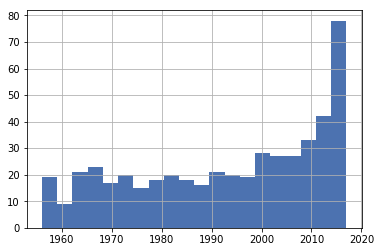

In [8]:
# years of songs with id
available_songs['Year'].astype('int64').hist(bins=20)

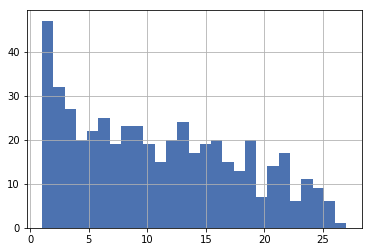

In [9]:
# ranks of songs with id
available_songs['Rank'].astype('int64').hist(bins=27)

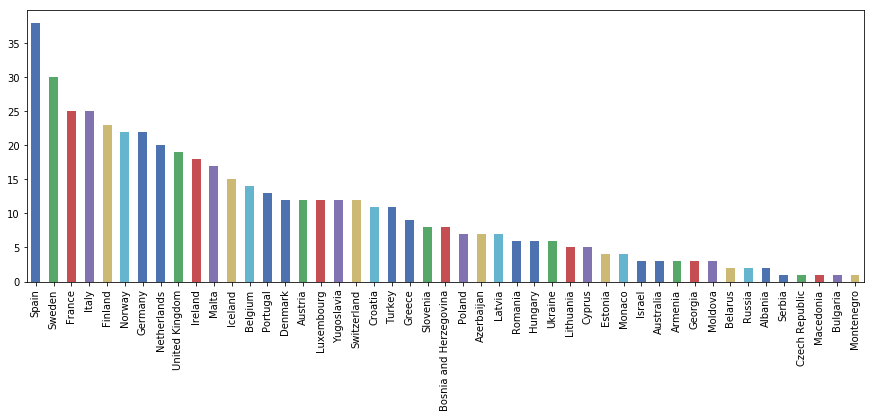

In [10]:
# countries of songs with id
available_songs['Country'].value_counts().plot(kind='bar', figsize=(15,5))

## Get Audio features of songs

In [10]:
tracks_full_info = list(available_songs.T.to_dict().values()) # list of dicts - dicts must have field 'id'
tracks_full_info = sp.get_audio_features_of_lots_of_tracks(tracks_full_info)

Api Call 0 from 0 to 19
Api Call 1 from 20 to 39
Api Call 2 from 40 to 59
Api Call 3 from 60 to 79
Api Call 4 from 80 to 99
Api Call 5 from 100 to 119
Api Call 6 from 120 to 139
Api Call 7 from 140 to 159
Api Call 8 from 160 to 179
Api Call 9 from 180 to 199
Api Call 10 from 200 to 219
Api Call 11 from 220 to 239
Api Call 12 from 240 to 259
Api Call 13 from 260 to 279
Api Call 14 from 280 to 299
Api Call 15 from 300 to 319
Api Call 16 from 320 to 339
Api Call 17 from 340 to 359
Api Call 18 from 360 to 379
Api Call 19 from 380 to 399
Api Call 20 from 400 to 419
Api Call 21 from 420 to 439
Api Call 22 from 440 to 459
Api Call 23 from 460 to 479
Api Call 24 from 480 to 490


In [75]:
# read from file if already downloaded
tracks_full_info = []
track_ids_read = []
if os.path.isfile('available_tracks_info.json'):
    json_data=open('available_tracks_info.json').read()
    tracks_full_info = json.loads(json_data)
    track_ids_read = [t['id'] for t in tracks_full_info]
    print("{} tracks read".format(len(track_ids_read)))

491 tracks read


## Explore audio features

In [13]:
# Create pandas dataframe
tracks_df = pd.DataFrame.from_dict(tracks_full_info).drop(['analysis_url', 'track_href', 'uri', 'id'], 1)

In [89]:
# read artists info to compare to eurovision songs
artists_tracks_full_info = []
artists_read = []
if os.path.isfile('../festivals2018/tracks_full_info.json'):
    json_data=open('../festivals2018/tracks_full_info.json').read()
    artists_tracks_full_info = json.loads(json_data)
    artists_read = set([sp.remove_accents(a['artist_name'].lower()) for a in artists_tracks_full_info])
    print("{} artists read - {} tracks read".format(len(artists_read),len(artists_tracks_full_info)))

# Create pandas dataframe
artists_tracks_df = pd.DataFrame.from_dict(artists_tracks_full_info).drop(['analysis_url', 'album_id', 'artist_id', 'track_href', 'uri', 'type', 'id'], 1)

59 artists read - 9646 tracks read


148 songs in subgroup "Top-5"
343 songs in subgroup "Rest"
0 single songs


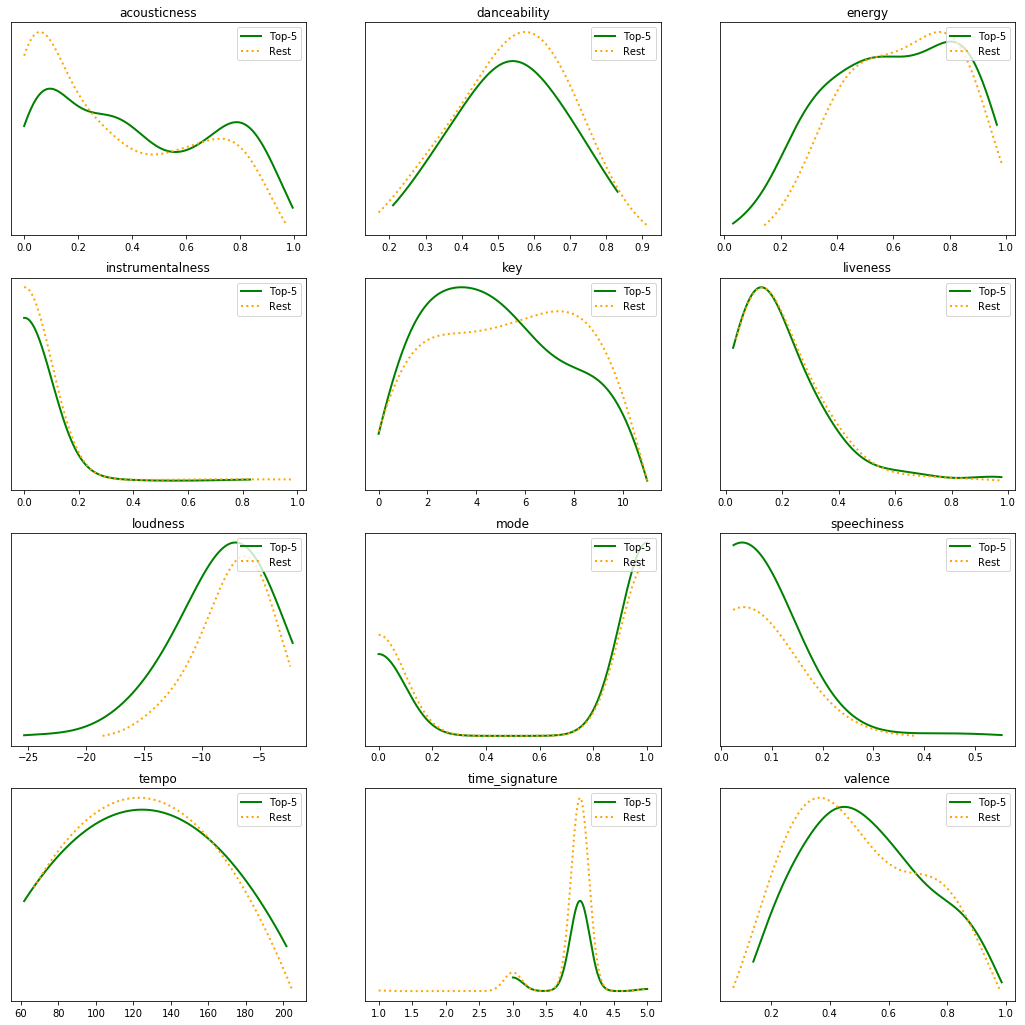

In [14]:
# plot feautures kde-style

from sklearn.neighbors.kde import KernelDensity

# split dataframes into different groups to compare

tracks_subgroups = [
    {
        'label': 'Top-5', 'color': 'green', 'linewidth': 2, 'linestyle': '-', 
        'df' : tracks_df[tracks_df['Rank'].astype('int') <= 5]
    },
    {
        'label': 'Rest', 'color': 'orange', 'linewidth': 2, 'linestyle': ':', 
        'df': tracks_df[tracks_df['Rank'].astype('int') > 5]
    }
    #{
    #    'label': 'Pau Vallvé', 'color': 'blue', 'linewidth': 2, 'linestyle': '-', 
    #    'df': artists_tracks_df[artists_tracks_df['artist_name'] == 'Pau Vallvé']
    #}
]

single_tracks = [
    #{
    #    'label': 'Protagonistes', 'color': 'red', 'linewidth': 2, 'linestyle': ':', 
    #    'df': tracks_subgroups[1]['df'][tracks_subgroups[1]['df']['name'] == 'Protagonistes']
    #}
]

for t in tracks_subgroups:
    print('{} songs in subgroup "{}"'.format(len(t['df']), t['label']))
print('{} single songs'.format(len(single_tracks)))
    
features = ['acousticness','danceability','energy','instrumentalness','key','liveness',\
            'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence'];

# plot with matplotlib
fig, ax = plt.subplots(4,3)
fig.set_figheight(18)
fig.set_figwidth(18)
i=0; j=0; # init at top-left subplot

for f in features:
    
    for t in tracks_subgroups:
                
        # create arrays with data
        x = np.array(t['df'][f])[:,np.newaxis];
        x_plot = np.linspace(x.min(), x.max(), 1000)[:, np.newaxis];

        # create kde model and fit with x data
        bandwidth = np.abs((0.1*x.mean()*x.std()));
        bandwidth = 0.1 if bandwidth<0.1 else bandwidth;
        kde_fit = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(x)

        # score_samples() returns the log-likelihood of the samples
        log_pdf = kde_fit.score_samples(x_plot)
        kde = np.exp(log_pdf)

        # normalize kde area = 1
        kde = kde/sum(kde)

        # plot
        ax[i,j].plot(x_plot, kde, 
                     color=t['color'], 
                     linewidth=t['linewidth'], 
                     linestyle=t['linestyle'], 
                     label=t['label'])
        ax[i,j].set_title(f)
        ax[i,j].set_yticks([])
    
    for t in single_tracks:
        ax[i,j].axvline(t['df'][f].values[0],
                    color=t['color'], 
                    linewidth=t['linewidth'], 
                    linestyle=t['linestyle'], 
                    label=t['label'])

    ax[i,j].legend(loc='upper right')

    # jump to next subplot
    j=j+1; # next col subplot
    if(j==3):
        # if last col subplot
        j=0; # first col subplot
        i=i+1; # next row subplot

# store plot to file
#filename = 'plots/'+' - '.join([sp.remove_accents(a['name'].lower()) for a in artists_to_compare]) + '.png'
#fig.savefig(filename, dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)